## GreenBytes 

GreenBytes helps forcast sales in resaurants during the Gagnathon, GreenBytes developed on our already existing solution that used past sales to determine future sales and added weather forcasts into the mix. 

The addition of weather data into our models allows GreenBytes to more accurately predict sales data and further reduce food waste, reducing the related CO2 emissons.

In [4]:
import numpy as np
import pandas as pd

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

### Data and Pre-Processing
The data used to train this model is the pre existing data that we have from our partner reasturant as well as the weather data for Reykjavik from Veðurstofa Íslands.

In [7]:
weather = pd.read_csv('weather.csv')
sales = pd.read_csv('dataScrubbed.csv')
sales

,Dags reiknings,Magn,Upphæð m/VSK,ID,Discription
0,2019-11-30,1.0,845,8,chickencurry
1,2019-11-30,1.0,845,76,túmerikskot
2,2019-11-30,1.0,595,67,spicy vegan lítil
3,2019-11-30,1.0,1195,67,spicy vegan lítil
4,2019-11-30,1.0,1195,57,pescado
...,...,...,...,...,...
45923,2020-01-02,0.0,0,71,toppur epla
45924,2020-01-02,0.0,0,76,túmerikskot
45925,2020-01-02,0.0,0,1,bergtoppur stórógarberja
45926,2020-01-02,0.0,0,72,toppur ferstórju


In [6]:
prodList = pd.read_csv('productKey.csv')
prodList = pd.Series(prodList['Menu Item'].values,index=prodList.ID).to_dict()

Determine the number of sales per day

In [5]:
perDay = pd.pivot_table(sales,index=['Dags reiknings'],
                        columns='Discription',values='Magn',
                        aggfunc=np.sum,fill_value=0)

In [6]:
perDay['total']=perDay.sum(axis=1)
perDay

Discription,avócadó,bergtoppur stórógarberja,caffe latte,cappucino,chango,chango lítil,chickencado,chickencado lítil,chickencurry,chickencurry lítil,...,tunacado lítil,túmerikskot,vanilla flirt,vanilla flirt lítil,vatn 330 ml,vatn 500 ml,winston wolf,winston wolf lítil,ávextir grænmeti,total
Dags reiknings,,,,,,,,,,,,,,,,,,,,,
2019-11-01,6,3,0,0,3,0,36,10,69,12,...,0,14,2,0,0,0,0,4,12,560.0
2019-11-02,4,0,0,0,2,0,19,10,59,7,...,3,11,0,0,2,0,0,0,9,592.0
2019-11-03,4,1,0,0,0,0,22,7,85,3,...,4,12,2,0,2,0,0,0,5,591.0
2019-11-04,5,0,0,0,4,0,22,7,54,4,...,3,9,2,0,0,1,0,0,17,551.0
2019-11-05,6,2,0,0,1,0,38,11,62,7,...,6,9,2,0,0,2,0,1,22,699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,6,0,0,0,2,0,24,4,51,3,...,2,18,3,0,1,0,0,0,7,506.0
2020-01-28,3,1,0,0,5,0,34,5,59,3,...,5,22,0,0,2,0,0,0,7,505.0
2020-01-29,6,1,0,0,0,0,27,8,54,11,...,0,22,1,0,2,0,0,0,12,520.0


In [7]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather.set_index('Date',inplace=True)

## Feature Engineering

In [8]:
perDay['Date'] = pd.to_datetime(perDay.index)
perDay['day of year'] = perDay['Date'].apply(lambda date:date.dayofyear)
perDay['day of month'] = perDay['Date'].apply(lambda date:date.day)
perDay['day of week'] = perDay['Date'].apply(lambda date:date.dayofweek)
perDay.drop('Date',axis=1,inplace=True)

Add Weather and Sales data to one dataframe

In [9]:
perDay.index=pd.to_datetime(perDay.index)

In [10]:
df = pd.concat([perDay,weather],axis=1,sort=False)
df.dropna(inplace=True)

In [11]:
df

,avócadó,bergtoppur stórógarberja,caffe latte,cappucino,chango,chango lítil,chickencado,chickencado lítil,chickencurry,chickencurry lítil,...,Mean Temp (°C) 2,High Temp (°C) 3,Low Temp (°C) 4,Precipitation (mm),Snow Depth,snjóhula (0-4),Sunlight Hours (klst),Mean Wind (m/s),Max Wind (m/s),Gust (m/s)
2019-11-01,6.0,3.0,0.0,0.0,3.0,0.0,36.0,10.0,69.0,12.0,...,2.5,5.8,-1.3,0.1,0,0,5.4,1.8,3.5,5.9
2019-11-02,4.0,0.0,0.0,0.0,2.0,0.0,19.0,10.0,59.0,7.0,...,3.1,4.7,0.5,0.0,0,0,0.0,2.9,5.4,8.3
2019-11-03,4.0,1.0,0.0,0.0,0.0,0.0,22.0,7.0,85.0,3.0,...,3.9,5.5,2.8,0.0,0,0,0.0,3.4,7.5,13.6
2019-11-04,5.0,0.0,0.0,0.0,4.0,0.0,22.0,7.0,54.0,4.0,...,2.4,4.3,1.4,1.2,0,0,1.2,2.3,5.6,8.8
2019-11-05,6.0,2.0,0.0,0.0,1.0,0.0,38.0,11.0,62.0,7.0,...,0.4,2.8,-0.5,4.3,0,0,3.1,3.0,4.9,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,6.0,0.0,0.0,0.0,2.0,0.0,24.0,4.0,51.0,3.0,...,0.5,2.3,-1.6,0.4,0,2,0.8,4.5,6.2,12.0
2020-01-28,3.0,1.0,0.0,0.0,5.0,0.0,34.0,5.0,59.0,3.0,...,-0.4,2.1,-1.3,4.1,8,4,3.5,3.2,6.5,12.8
2020-01-29,6.0,1.0,0.0,0.0,0.0,0.0,27.0,8.0,54.0,11.0,...,-2.7,1.9,-4.9,0.0,6,4,6.2,1.9,4.0,5.7
2020-01-30,9.0,1.0,0.0,0.0,1.0,0.0,51.0,5.0,91.0,5.0,...,-1.4,2.1,-4.9,0.0,6,4,6.1,1.8,5.2,8.0


## Data Visualization

In [12]:
df.columns

Index(['avócadó', 'bergtoppur stórógarberja ', 'caffe latte ', 'cappucino ',
       'chango', 'chango lítil', 'chickencado', 'chickencado lítil',
       'chickencurry', 'chickencurry lítil', 'coke ', 'coke lite  ', 'dazed',
       'dazed lítil', 'elvis ', 'elvis lítil', 'espresso ', 'gjafabréf',
       'good times', 'good times lítil', 'greenday ', 'greenday lítil',
       'hafragrautur með eplum ', 'hafragrautur með granóla', 'hangover',
       'hangover lítil', 'hawaiian flirt ', 'hawaiian flirt lítil',
       'honey bunny', 'honey bunny lítil', 'icelandic flirt ',
       'icelandic flirt lítil', 'indian flirt ', 'indian flirt lítil', 'jj ',
       'jj lítil', 'kaffi ', 'kaffi curro ', 'kaffi curro lítil',
       'kaffi frappó ', 'kaffi frappó lítil', 'kjöt', 'lota love ',
       'lota love lítil', 'lítil poki', 'lítil samloka', 'macchiato ',
       'mocha ', 'mozarella', 'mozzato', 'mozzato lítil', 'mr. blonde ',
       'mr. blonde lítil', 'nice guy', 'nice guy lítil', 'parmella',
 

In [13]:
vis = df.drop(['avócadó', 'bergtoppur stórógarberja ', 'caffe latte ', 'cappucino ',
       'chango', 'chango lítil', 'chickencado', 'chickencado lítil',
       'chickencurry', 'chickencurry lítil', 'coke ', 'coke lite  ', 'dazed',
       'dazed lítil', 'elvis ', 'elvis lítil', 'espresso ', 'gjafabréf',
       'good times', 'good times lítil', 'greenday ', 'greenday lítil',
       'hafragrautur með eplum ', 'hafragrautur með granóla', 'hangover',
       'hangover lítil', 'hawaiian flirt ', 'hawaiian flirt lítil',
       'honey bunny', 'honey bunny lítil', 'icelandic flirt ',
       'icelandic flirt lítil', 'indian flirt ', 'indian flirt lítil', 'jj ',
       'jj lítil', 'kaffi ', 'kaffi curro ', 'kaffi curro lítil',
       'kaffi frappó ', 'kaffi frappó lítil', 'kjöt', 'lota love ',
       'lota love lítil', 'lítil poki', 'lítil samloka', 'macchiato ',
       'mocha ', 'mozarella', 'mozzato', 'mozzato lítil', 'mr. blonde ',
       'mr. blonde lítil', 'nice guy', 'nice guy lítil', 'parmella',
       'parmella lítil', 'pescado', 'pescado lítil', 'presley',
       'presley lítil', 'próteinduft', 'spicy chicken', 'spicy chicken lítil',
       'spicy tuna', 'spicy tuna lítil', 'spicy vegan', 'spicy vegan lítil',
       'stór poki', 'tabasco', 'toppur appelsínu ', 'toppur epla ',
       'toppur ferstórju ', 'toppur kolsýrt vatn ', 'tunacado',
       'tunacado lítil', 'túmerikskot ', 'vanilla flirt ',
       'vanilla flirt lítil', 'vatn 330 ml ', 'vatn 500 ml ', 'winston wolf',
       'winston wolf lítil', 'ávextir grænmeti'],axis=1)

In [14]:
vis

,total,day of year,day of month,day of week,Mean Temp (°C) 2,High Temp (°C) 3,Low Temp (°C) 4,Precipitation (mm),Snow Depth,snjóhula (0-4),Sunlight Hours (klst),Mean Wind (m/s),Max Wind (m/s),Gust (m/s)
2019-11-01,560.0,305.0,1.0,4.0,2.5,5.8,-1.3,0.1,0,0,5.4,1.8,3.5,5.9
2019-11-02,592.0,306.0,2.0,5.0,3.1,4.7,0.5,0.0,0,0,0.0,2.9,5.4,8.3
2019-11-03,591.0,307.0,3.0,6.0,3.9,5.5,2.8,0.0,0,0,0.0,3.4,7.5,13.6
2019-11-04,551.0,308.0,4.0,0.0,2.4,4.3,1.4,1.2,0,0,1.2,2.3,5.6,8.8
2019-11-05,699.0,309.0,5.0,1.0,0.4,2.8,-0.5,4.3,0,0,3.1,3.0,4.9,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,506.0,27.0,27.0,0.0,0.5,2.3,-1.6,0.4,0,2,0.8,4.5,6.2,12.0
2020-01-28,505.0,28.0,28.0,1.0,-0.4,2.1,-1.3,4.1,8,4,3.5,3.2,6.5,12.8
2020-01-29,520.0,29.0,29.0,2.0,-2.7,1.9,-4.9,0.0,6,4,6.2,1.9,4.0,5.7
2020-01-30,540.0,30.0,30.0,3.0,-1.4,2.1,-4.9,0.0,6,4,6.1,1.8,5.2,8.0


In [15]:
vis.corr()['total'].sort_values()

Gust (m/s)              -0.307373
Max Wind (m/s)          -0.271781
Precipitation (mm)      -0.230634
Mean Wind (m/s)         -0.227294
snjóhula (0-4)          -0.187718
day of week             -0.133448
Snow Depth              -0.016163
High Temp (°C) 3        -0.006350
day of month             0.006095
Mean Temp (°C) 2         0.040930
day of year              0.064314
Low Temp (°C) 4          0.064775
Sunlight Hours (klst)    0.132109
total                    1.000000
Name: total, dtype: float64

The greatest correlation between the total sales and the weather/time data:

Gusts, 
Max Wind Speed,
Precipitation,
Snow Cover,
Day of Week,
Sunlight Hours

The rest will be excluded from the model.

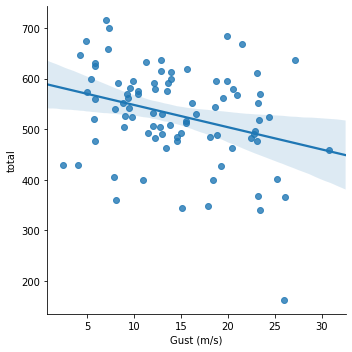

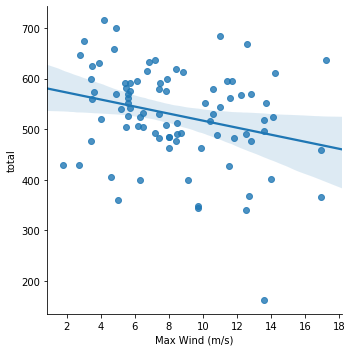

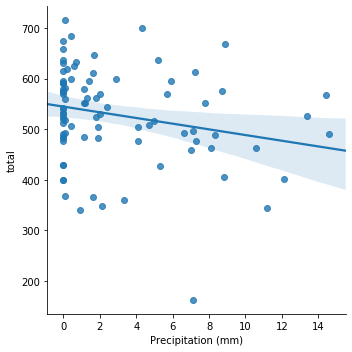

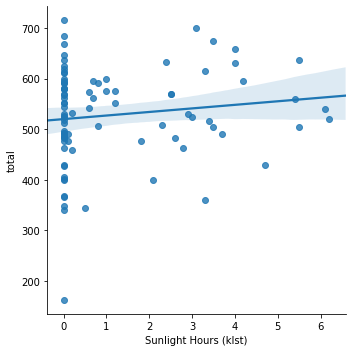

In [16]:
sns.lmplot(y='total',x='Gust (m/s)',data=vis)
sns.lmplot(y='total',x='Max Wind (m/s)',data=vis)
sns.lmplot(y='total',x='Precipitation (mm)',data=vis)
sns.lmplot(y='total',x='Sunlight Hours (klst)',data=vis)

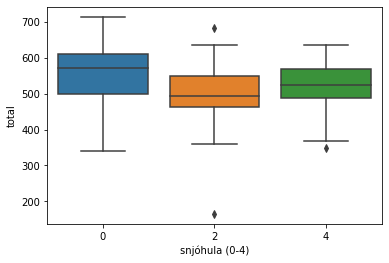

In [17]:
sns.boxplot(y='total',x='snjóhula (0-4)',data=vis)

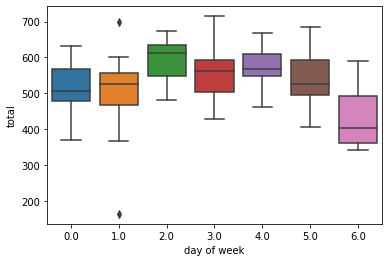

In [18]:
sns.boxplot(y='total',x='day of week',data=vis)

## Data Processing

In [19]:
df.drop(['day of year','day of month', 'Mean Temp (°C) 2', 'High Temp (°C) 3',
       'Low Temp (°C) 4', 'Snow Depth',
       'Mean Wind (m/s)'],axis=1,inplace=True)

In [20]:
df.head()

,avócadó,bergtoppur stórógarberja,caffe latte,cappucino,chango,chango lítil,chickencado,chickencado lítil,chickencurry,chickencurry lítil,...,winston wolf,winston wolf lítil,ávextir grænmeti,total,day of week,Precipitation (mm),snjóhula (0-4),Sunlight Hours (klst),Max Wind (m/s),Gust (m/s)
2019-11-01,6.0,3.0,0.0,0.0,3.0,0.0,36.0,10.0,69.0,12.0,...,0.0,4.0,12.0,560.0,4.0,0.1,0,5.4,3.5,5.9
2019-11-02,4.0,0.0,0.0,0.0,2.0,0.0,19.0,10.0,59.0,7.0,...,0.0,0.0,9.0,592.0,5.0,0.0,0,0.0,5.4,8.3
2019-11-03,4.0,1.0,0.0,0.0,0.0,0.0,22.0,7.0,85.0,3.0,...,0.0,0.0,5.0,591.0,6.0,0.0,0,0.0,7.5,13.6
2019-11-04,5.0,0.0,0.0,0.0,4.0,0.0,22.0,7.0,54.0,4.0,...,0.0,0.0,17.0,551.0,0.0,1.2,0,1.2,5.6,8.8
2019-11-05,6.0,2.0,0.0,0.0,1.0,0.0,38.0,11.0,62.0,7.0,...,0.0,1.0,22.0,699.0,1.0,4.3,0,3.1,4.9,7.4


## Target Data for Prediction

In [21]:
targets = list(prodList.values())
len(targets)

84

In [22]:
shift_days = 3

In [23]:
df_targets = df[targets].shift(-shift_days)

In [24]:
df[targets].head(shift_days+5)

,hangover,chango,tunacado,chickencado,spicy tuna,mozzato,spicy chicken,parmella,pescado,chickencurry,...,toppur kolsýrt vatn,coke,coke lite,toppur appelsínu,vatn 500 ml,toppur epla,túmerikskot,bergtoppur stórógarberja,toppur ferstórju,vatn 330 ml
2019-11-01,19.0,3.0,12.0,36.0,5.0,2.0,15.0,0.0,19.0,69.0,...,24.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,56.0,0.0
2019-11-02,24.0,2.0,18.0,19.0,5.0,1.0,21.0,3.0,12.0,59.0,...,27.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,59.0,2.0
2019-11-03,14.0,0.0,10.0,22.0,9.0,3.0,13.0,5.0,10.0,85.0,...,22.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,56.0,2.0
2019-11-04,25.0,4.0,8.0,22.0,5.0,5.0,12.0,8.0,18.0,54.0,...,18.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,54.0,0.0
2019-11-05,35.0,1.0,14.0,38.0,0.0,5.0,11.0,8.0,24.0,62.0,...,25.0,0.0,0.0,0.0,2.0,0.0,9.0,2.0,72.0,0.0
2019-11-06,30.0,2.0,23.0,32.0,12.0,1.0,10.0,8.0,32.0,57.0,...,16.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,67.0,1.0
2019-11-07,25.0,1.0,19.0,29.0,7.0,1.0,11.0,6.0,23.0,96.0,...,28.0,0.0,0.0,0.0,2.0,0.0,9.0,2.0,94.0,1.0
2019-11-08,22.0,2.0,9.0,26.0,2.0,3.0,11.0,3.0,24.0,61.0,...,23.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,54.0,0.0


In [25]:
df_targets.head(5)

,hangover,chango,tunacado,chickencado,spicy tuna,mozzato,spicy chicken,parmella,pescado,chickencurry,...,toppur kolsýrt vatn,coke,coke lite,toppur appelsínu,vatn 500 ml,toppur epla,túmerikskot,bergtoppur stórógarberja,toppur ferstórju,vatn 330 ml
2019-11-01,25.0,4.0,8.0,22.0,5.0,5.0,12.0,8.0,18.0,54.0,...,18.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,54.0,0.0
2019-11-02,35.0,1.0,14.0,38.0,0.0,5.0,11.0,8.0,24.0,62.0,...,25.0,0.0,0.0,0.0,2.0,0.0,9.0,2.0,72.0,0.0
2019-11-03,30.0,2.0,23.0,32.0,12.0,1.0,10.0,8.0,32.0,57.0,...,16.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,67.0,1.0
2019-11-04,25.0,1.0,19.0,29.0,7.0,1.0,11.0,6.0,23.0,96.0,...,28.0,0.0,0.0,0.0,2.0,0.0,9.0,2.0,94.0,1.0
2019-11-05,22.0,2.0,9.0,26.0,2.0,3.0,11.0,3.0,24.0,61.0,...,23.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,54.0,0.0


In [26]:
df_targets.tail()

,hangover,chango,tunacado,chickencado,spicy tuna,mozzato,spicy chicken,parmella,pescado,chickencurry,...,toppur kolsýrt vatn,coke,coke lite,toppur appelsínu,vatn 500 ml,toppur epla,túmerikskot,bergtoppur stórógarberja,toppur ferstórju,vatn 330 ml
2020-01-27,14.0,1.0,12.0,51.0,8.0,4.0,8.0,6.0,6.0,91.0,...,15.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,45.0,1.0
2020-01-28,28.0,2.0,8.0,32.0,8.0,0.0,21.0,9.0,15.0,77.0,...,29.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,59.0,2.0
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Convert to NumPy Arrays

In [27]:
X = df.values[0:-shift_days]

In [28]:
print(type(X))
print("Shape", X.shape)

<class 'numpy.ndarray'>
Shape (84, 91)


In [29]:
y = df_targets.values[:-shift_days]

In [30]:
print(type(y))
print("Shape", y.shape)

<class 'numpy.ndarray'>
Shape (84, 84)


Number of observations

In [31]:
num_data = len(X)
num_data

84

Fraction of the data-set that will be sued for the training-set

In [32]:
train_split = 0.9

Number of observations in the training-set

In [33]:
num_train = int(train_split * num_data)
num_train

75

Number of observations in the test-set

In [34]:
num_test = num_data - num_train
num_test

9

Split the train and test set

In [35]:
X_train = X[0:num_train]
X_test = X[num_train:]
len(X_train) + len(X_test)

84

In [36]:
y_train = y[0:num_train]
y_test = y[num_train:]
len(y_train) + len(y_test)

84

Number of signals

In [37]:
num_x_signals = X.shape[1]
num_y_signals = y.shape[1]

## Scale Data

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
x_scaler = MinMaxScaler()

In [40]:
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [41]:
y_scaler = MinMaxScaler()

In [42]:
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Data Generator

In [43]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = X_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [44]:
batch_size = 256

In [45]:
sequence_length = 7 * 2
sequence_length

14

In [46]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [47]:
x_batch, y_batch = next(generator)

In [48]:
print(x_batch.shape)
print(y_batch.shape)

(256, 14, 91)
(256, 14, 84)


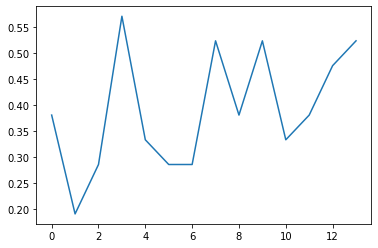

In [49]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

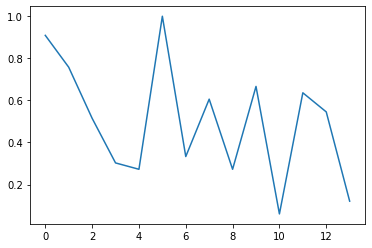

In [50]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

### Validation Set

In [51]:
validation_data = (np.expand_dims(X_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

# Create RNN

In [52]:
import tensorflow as tf

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [53]:
model = Sequential()

In [54]:
model.add(GRU(units=50,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [56]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

### Loss Function

In [57]:
warmup_steps = 3

In [58]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

### Complie Model

In [59]:
optimizer = RMSprop(lr=1e-3)

In [60]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 50)          21300     
_________________________________________________________________
dense (Dense)                (None, None, 84)          4284      
Total params: 25,584
Trainable params: 25,584
Non-trainable params: 0
_________________________________________________________________


### Callback Functions

In [62]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [63]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [64]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [65]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [66]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

## Train the RNN

In [67]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0448
Epoch 00001: val_loss improved from inf to 0.03979, saving model to 23_checkpoint.keras
100/100 [==============================] - 6s 65ms/step - loss: 0.0447 - val_loss: 0.0398
Epoch 2/20
 98/100 [============================>.] - ETA: 0s - loss: 0.0292- ETA:
Epoch 00002: val_loss did not improve from 0.03979

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 4s 45ms/step - loss: 0.0291 - val_loss: 0.0425
Epoch 3/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0229
Epoch 00003: val_loss did not improve from 0.03979

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 4s 42ms/step - loss: 0.0229 - val_loss: 0.0432
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0213
Epoch 00004: val_loss did not improve from 0.03979
100/100 [==================

Performance

In [68]:
result = model.evaluate(x=np.expand_dims(X_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 4ms/sample - loss: 0.0457


In [69]:
print("loss (test-set):", result)

loss (test-set): 0.04572662338614464


In [70]:
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [71]:
loss_df = pd.DataFrame(model.history.history)

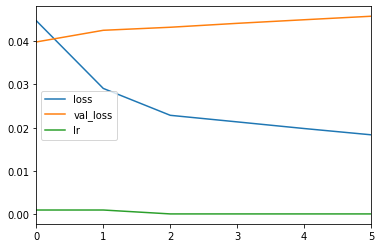

In [72]:
loss_df.plot()

In [73]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = X_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = X_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(targets)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(targets[signal])
        plt.legend()
        plt.show()

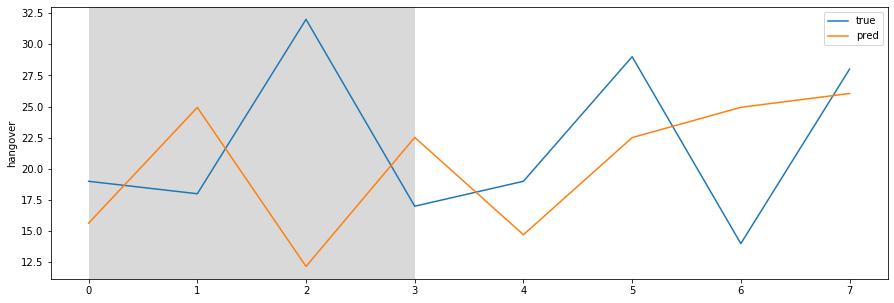

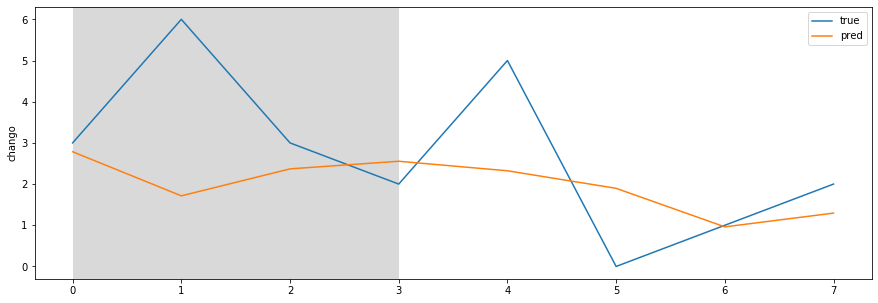

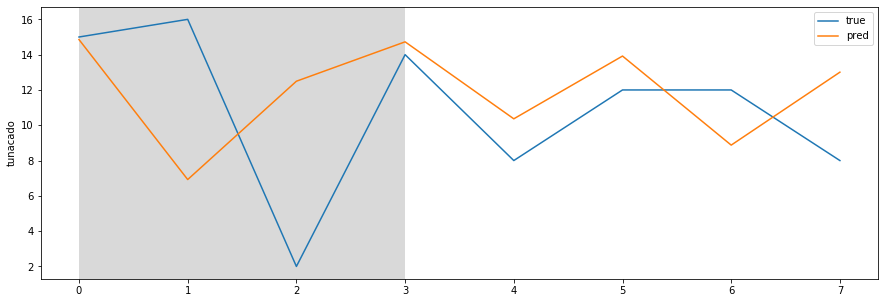

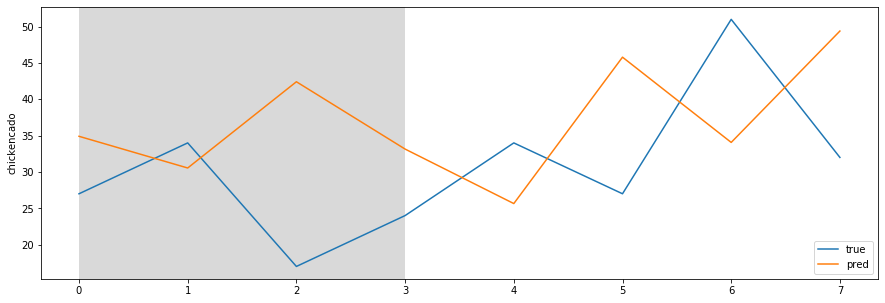

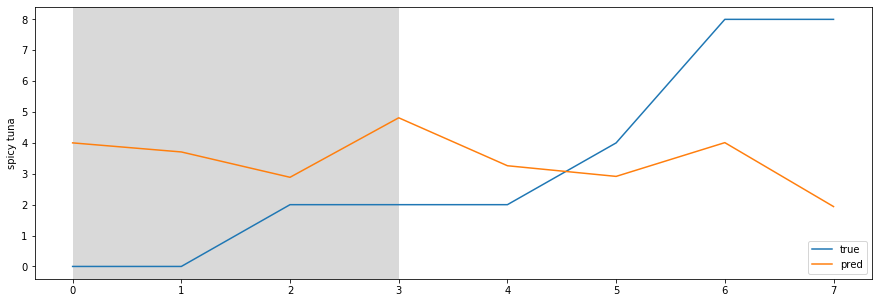

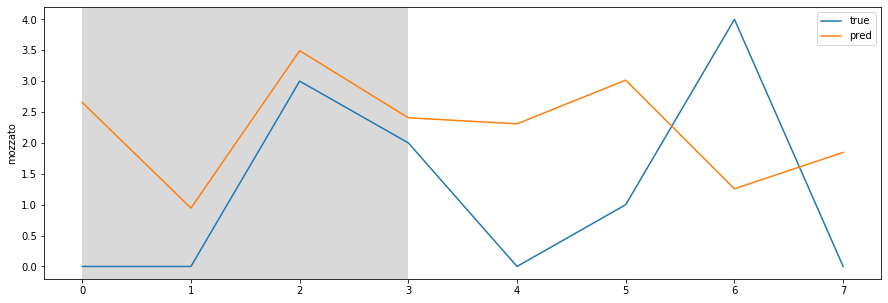

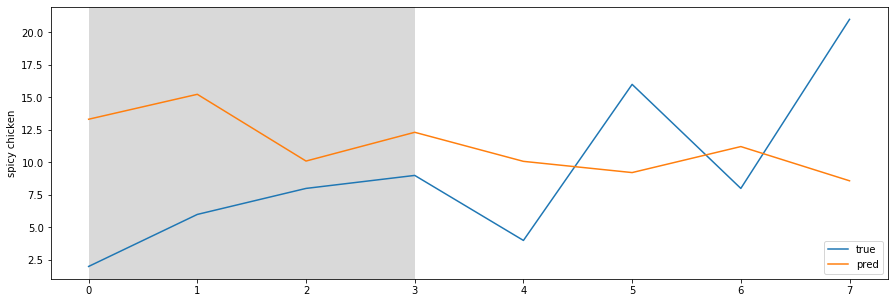

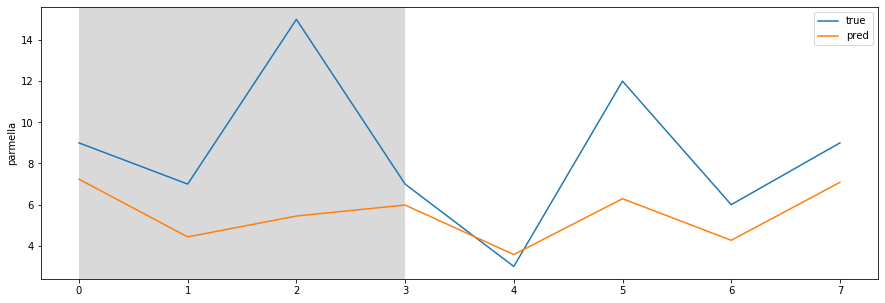

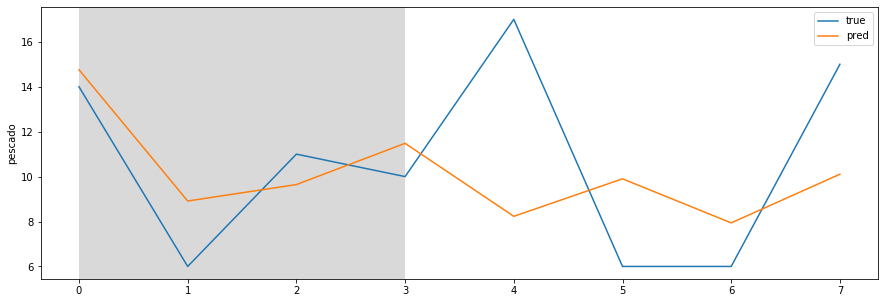

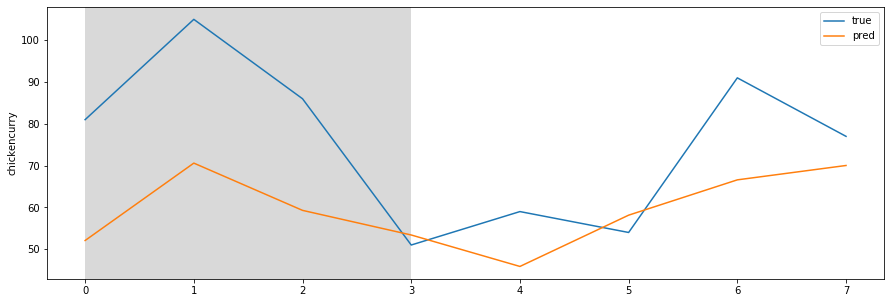

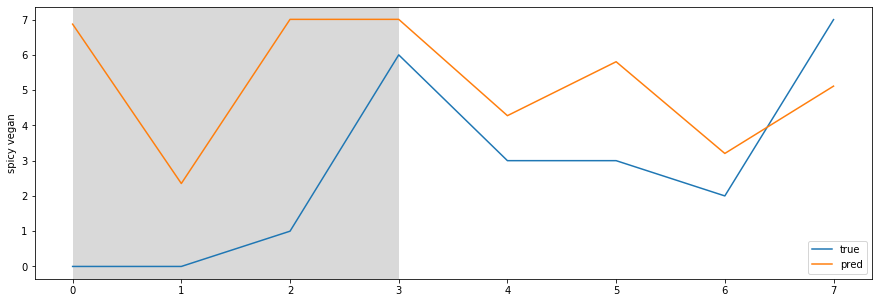

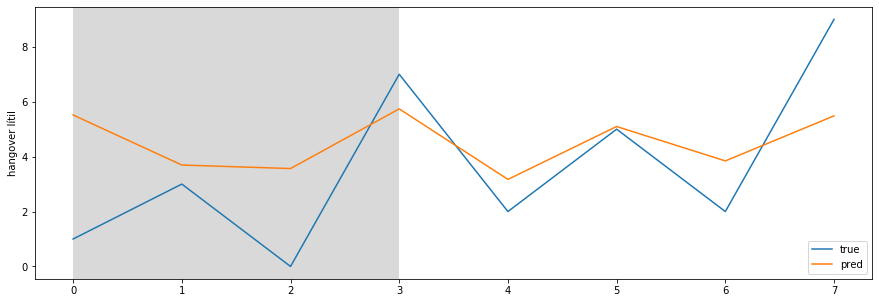

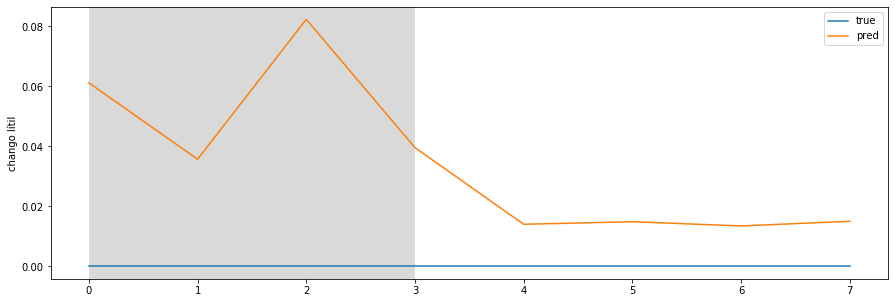

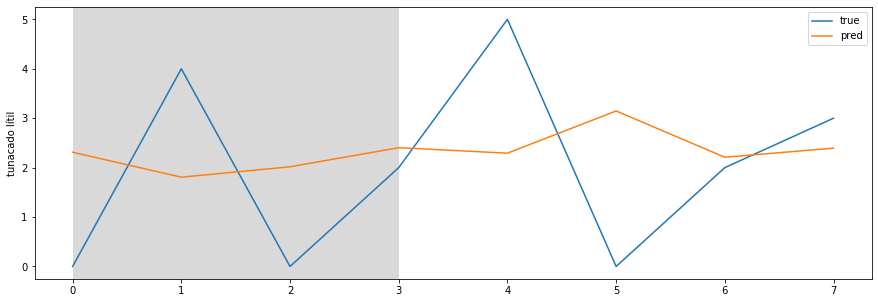

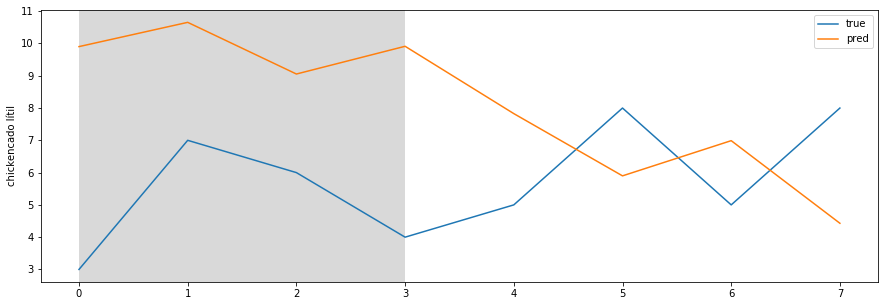

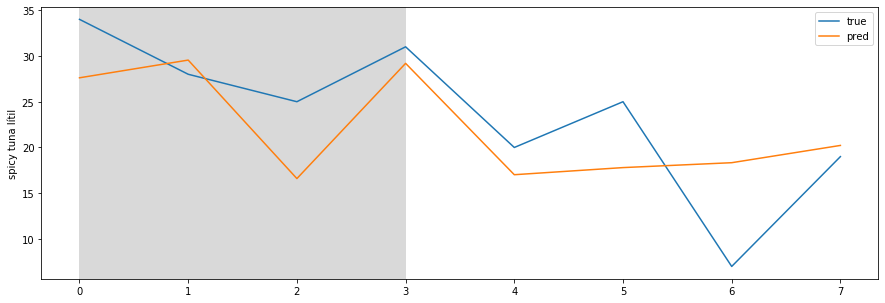

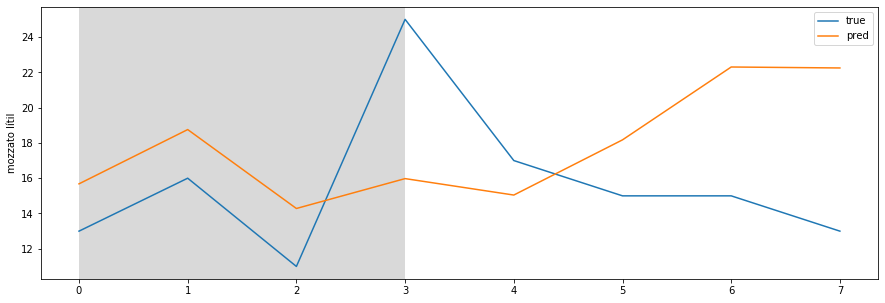

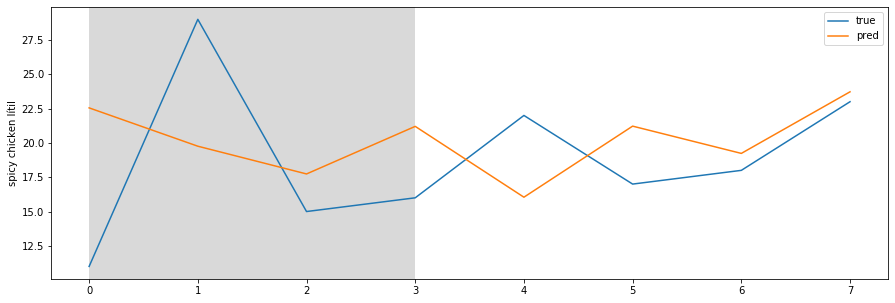

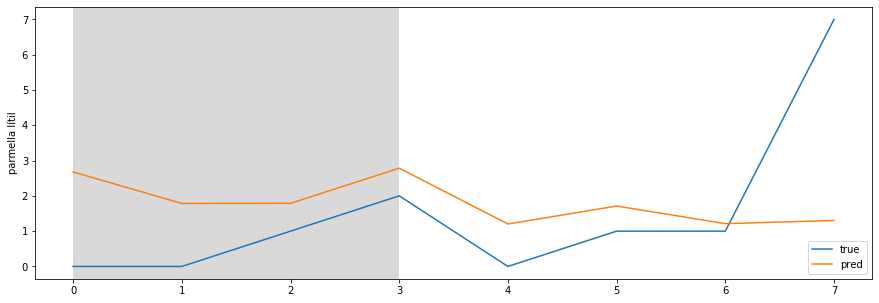

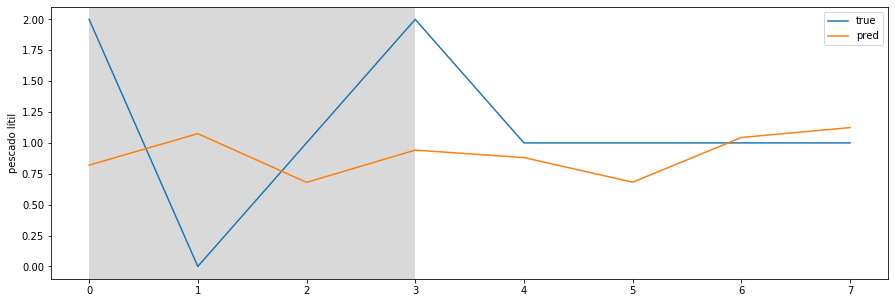

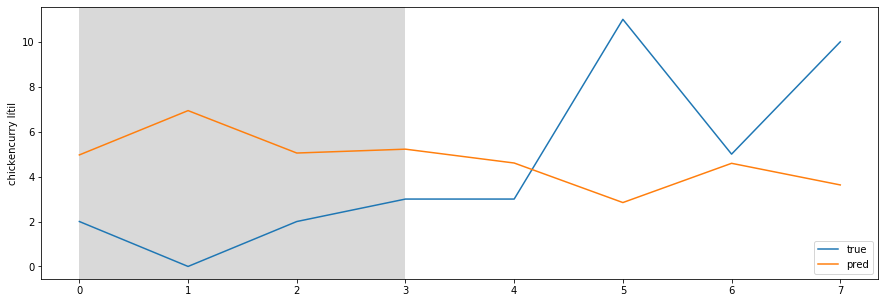

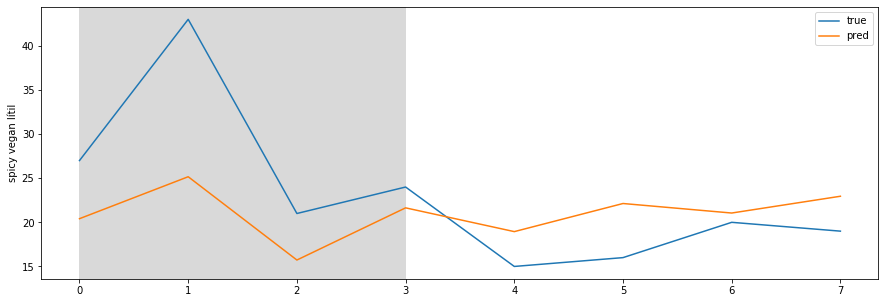

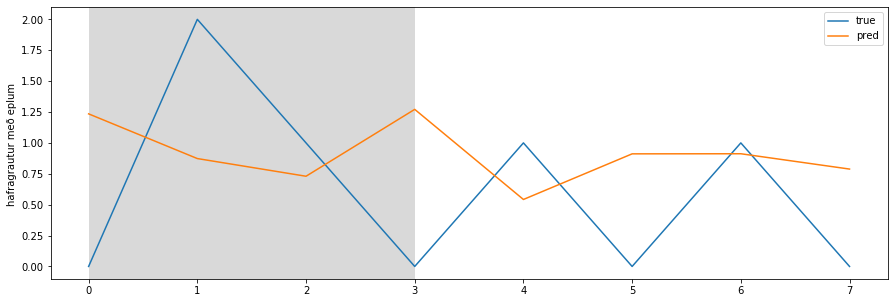

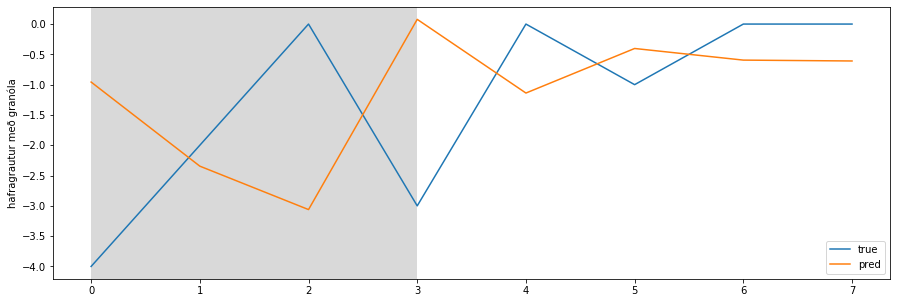

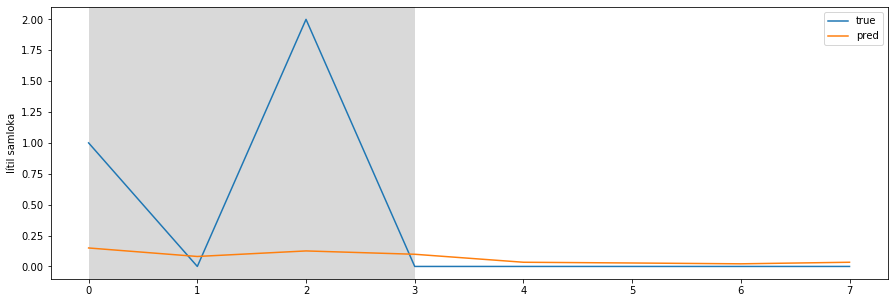

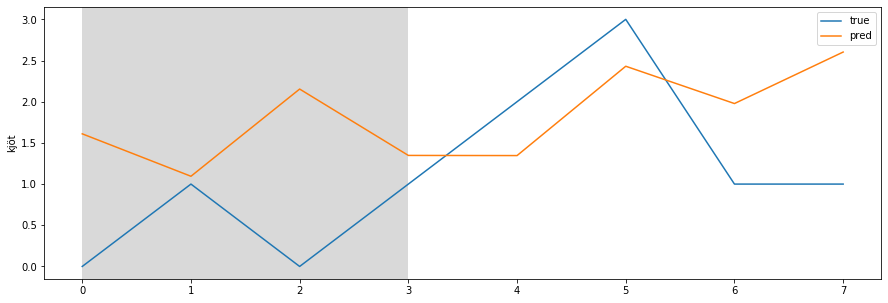

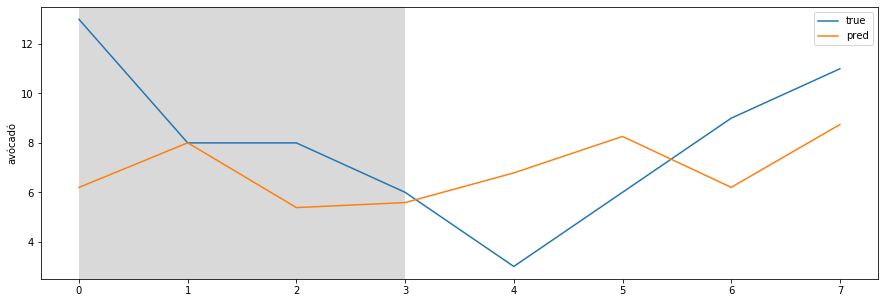

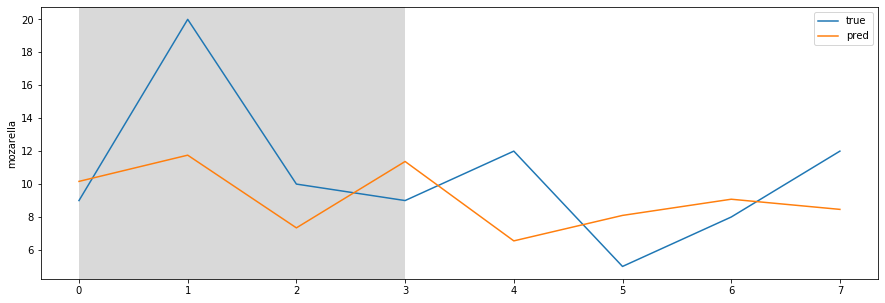

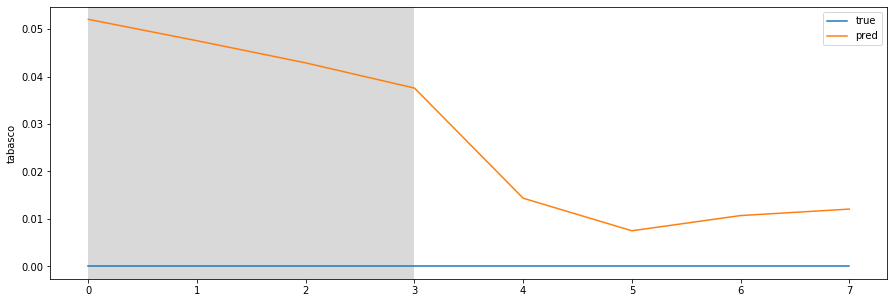

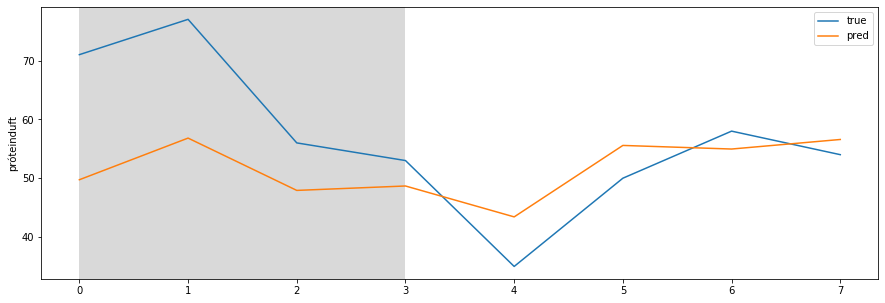

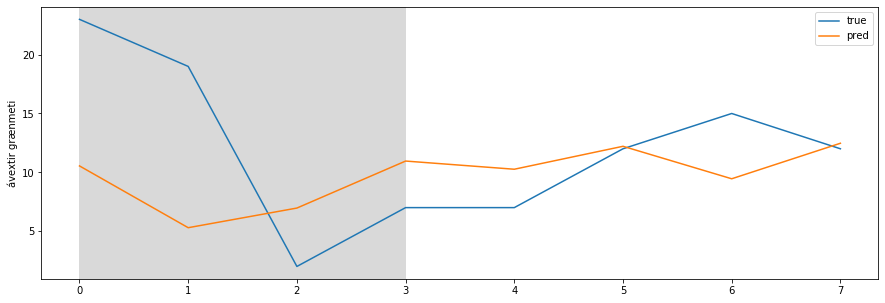

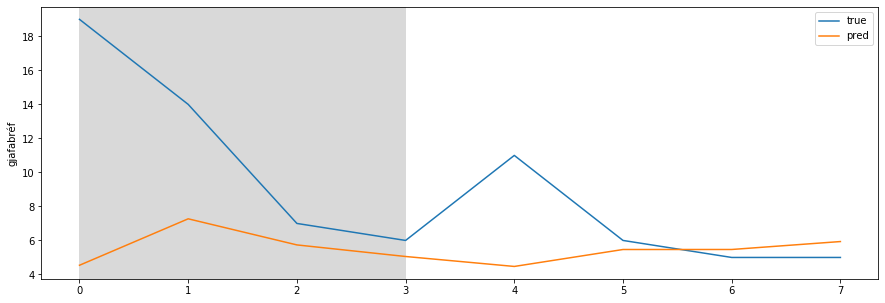

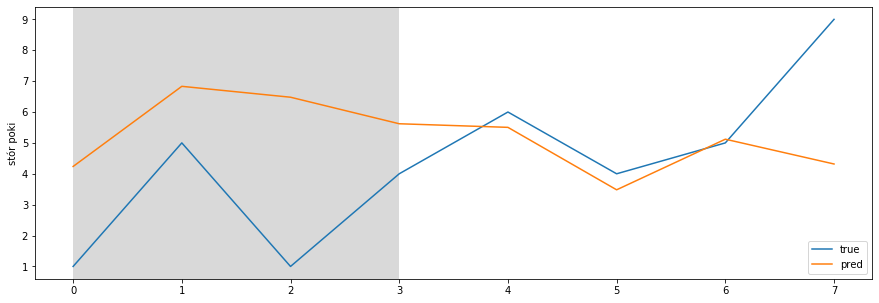

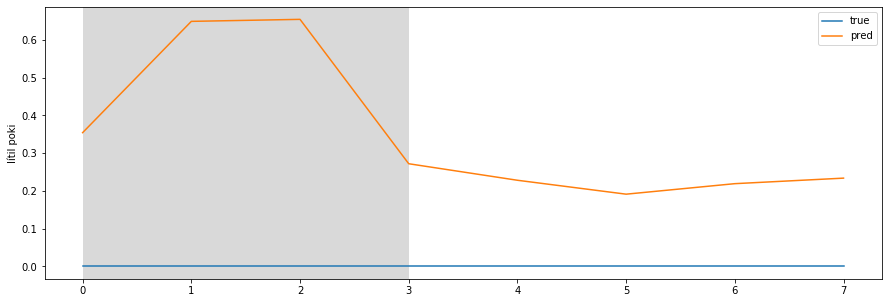

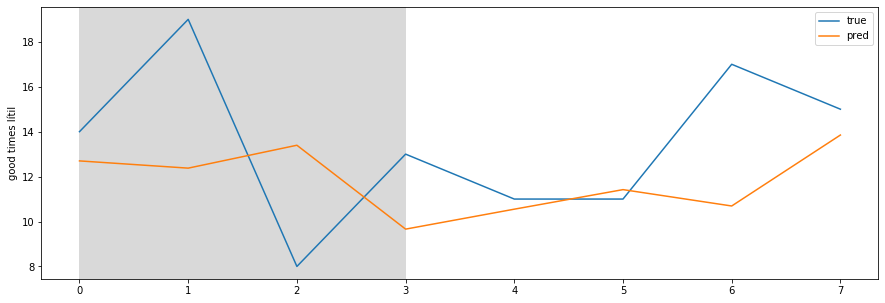

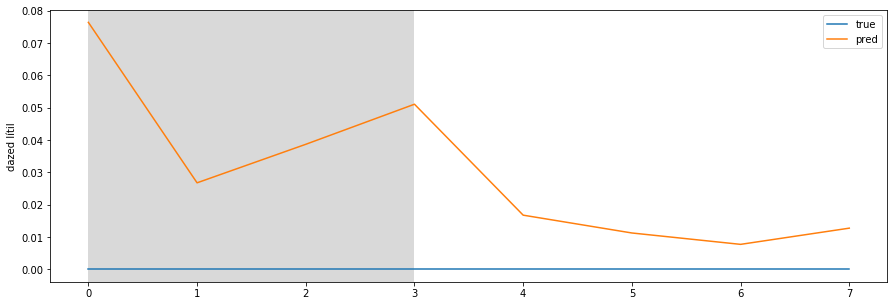

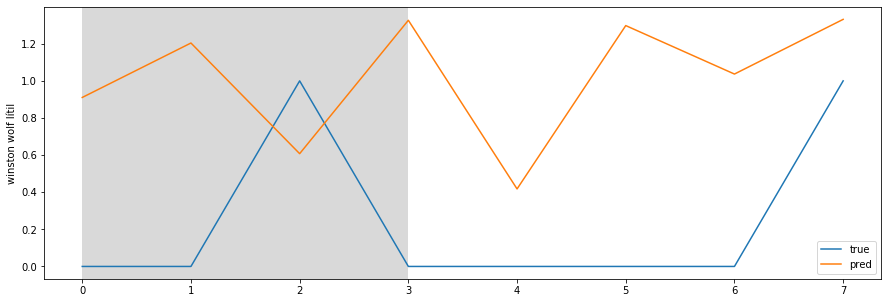

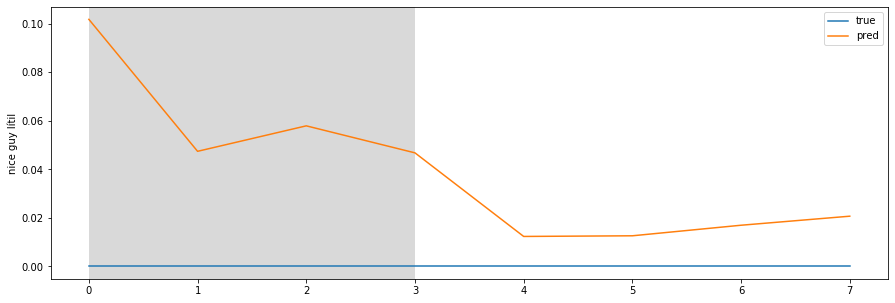

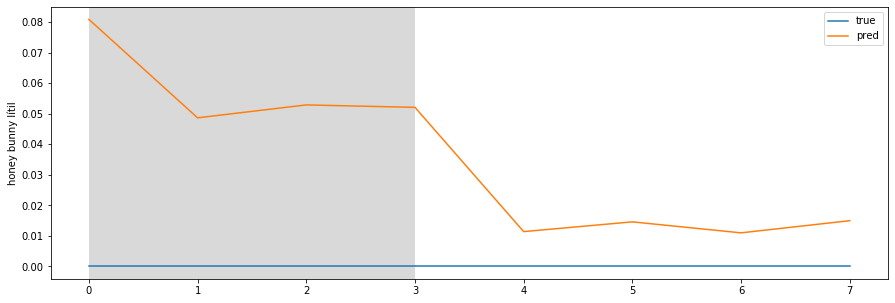

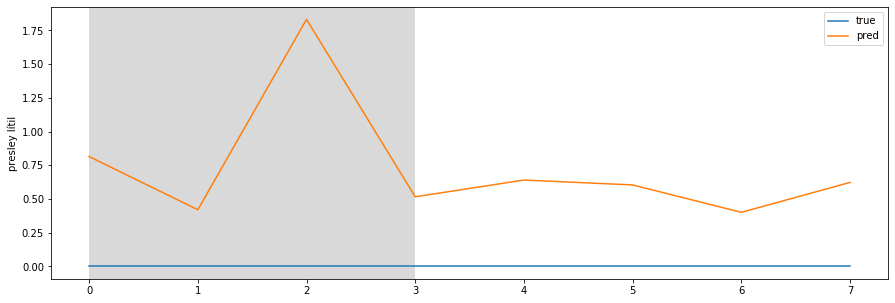

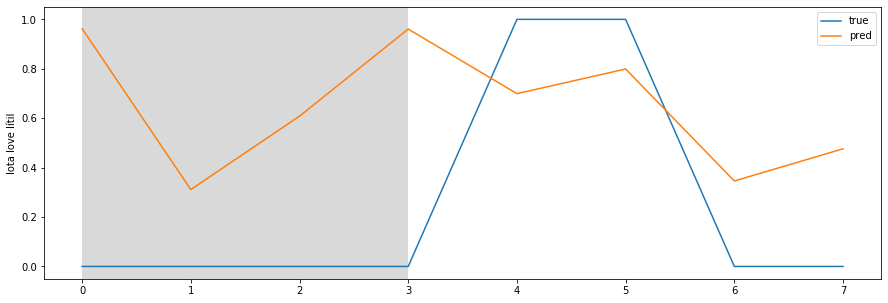

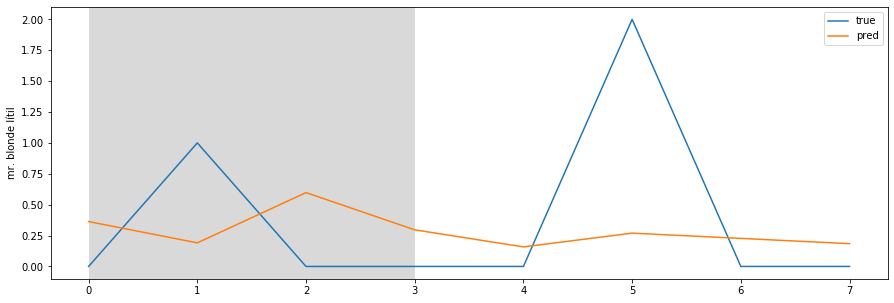

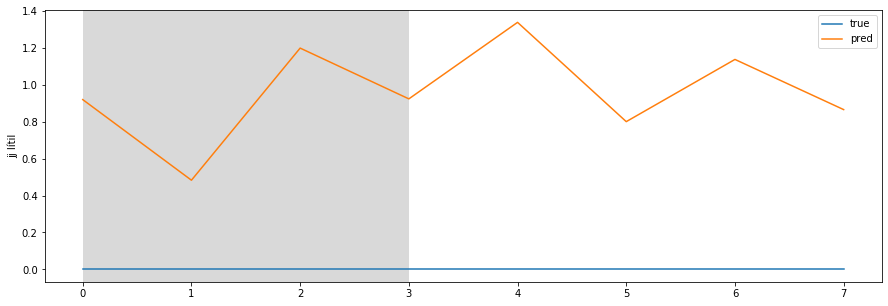

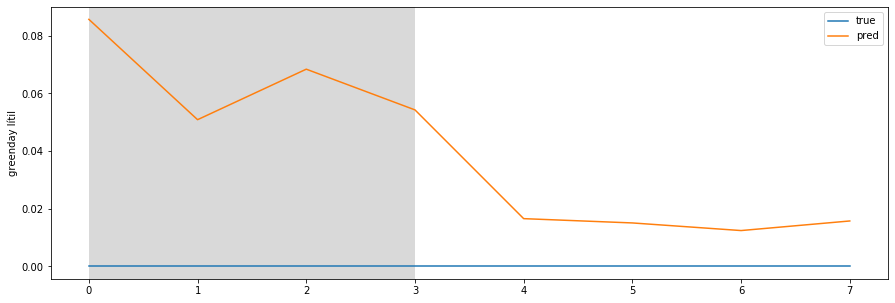

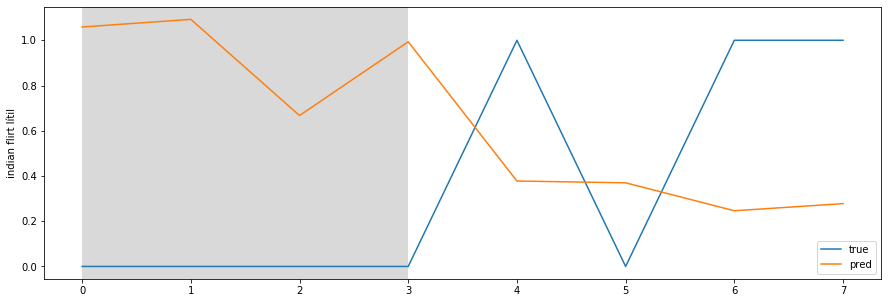

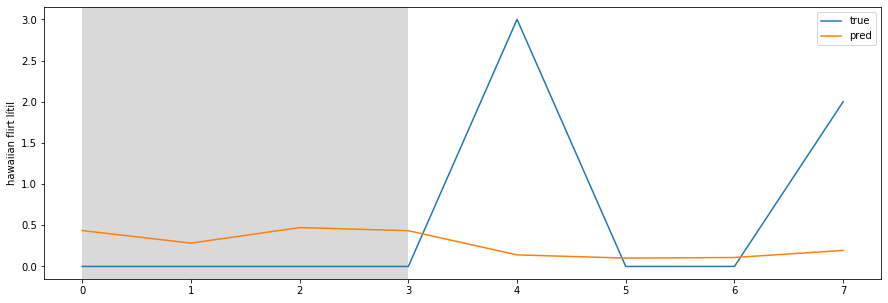

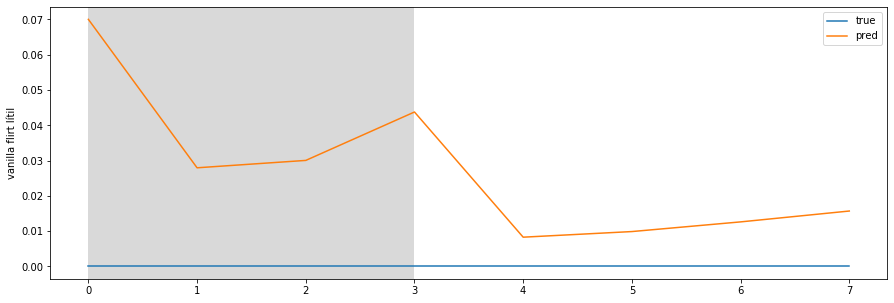

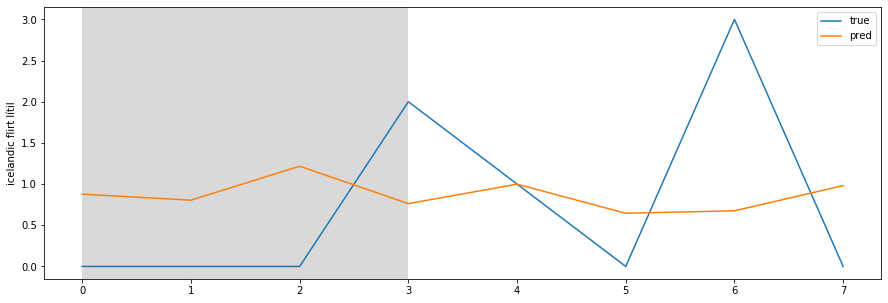

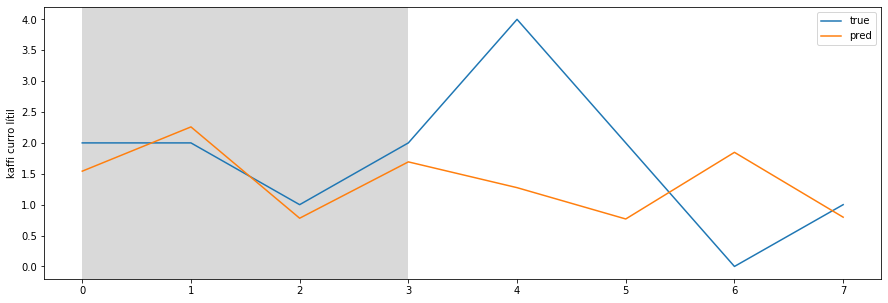

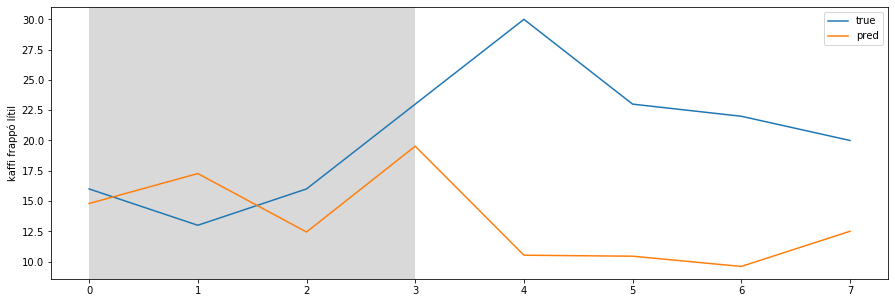

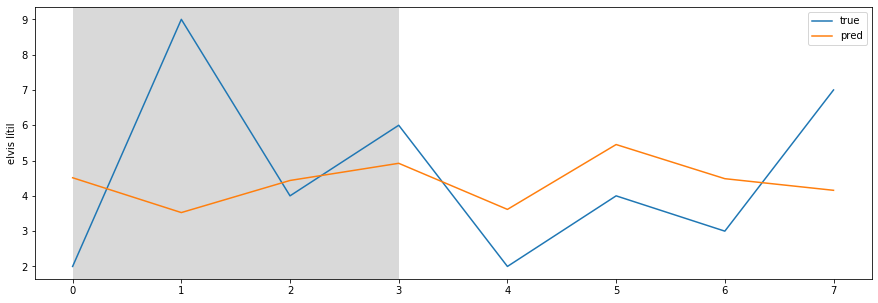

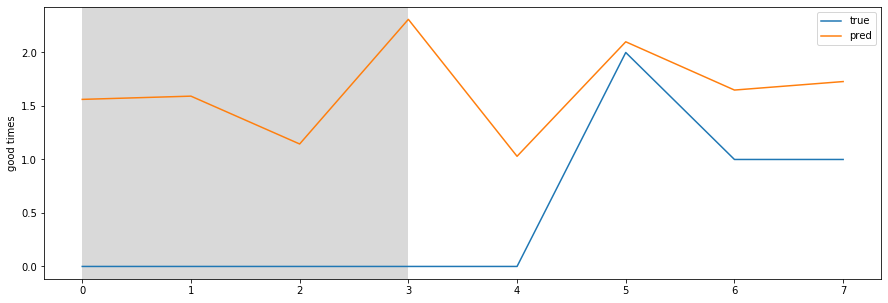

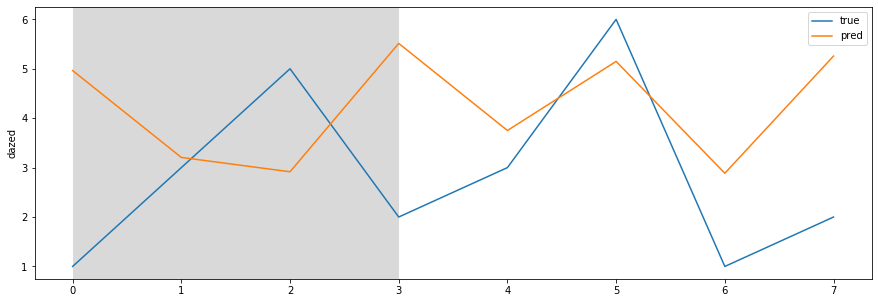

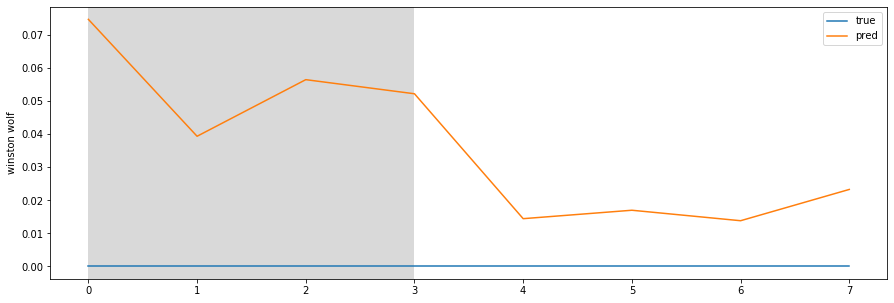

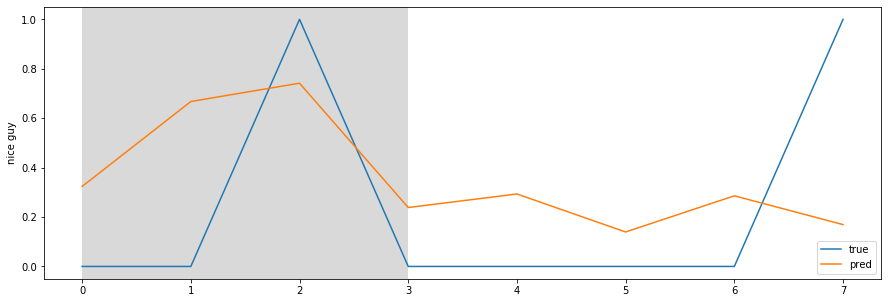

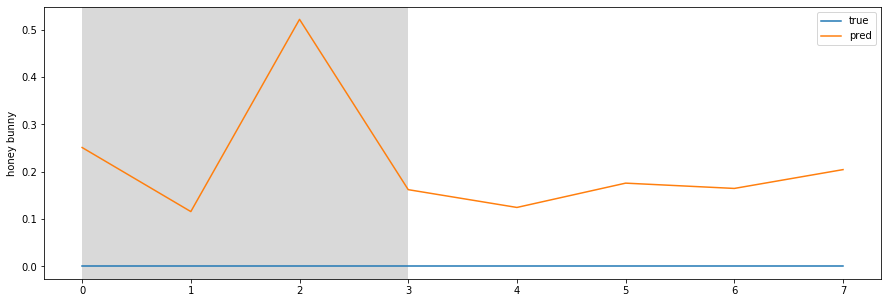

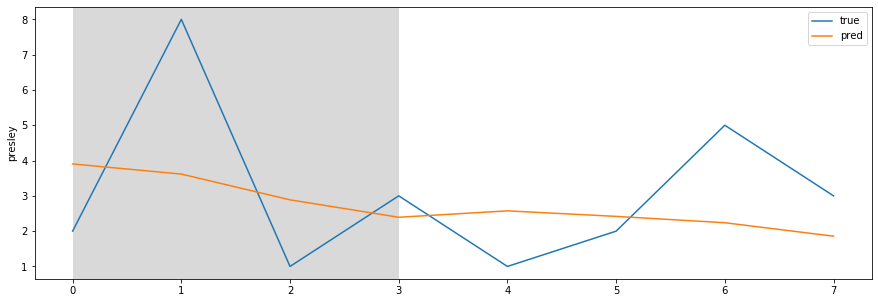

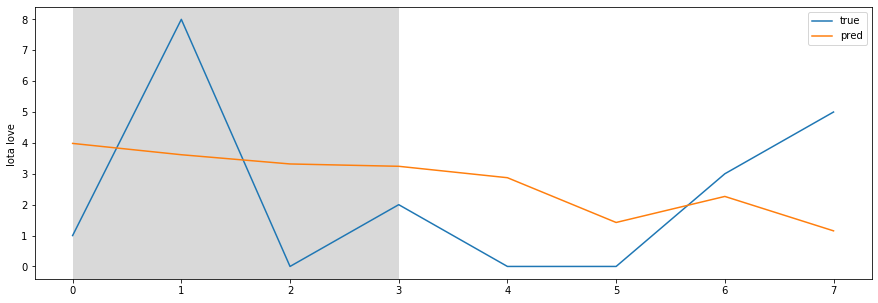

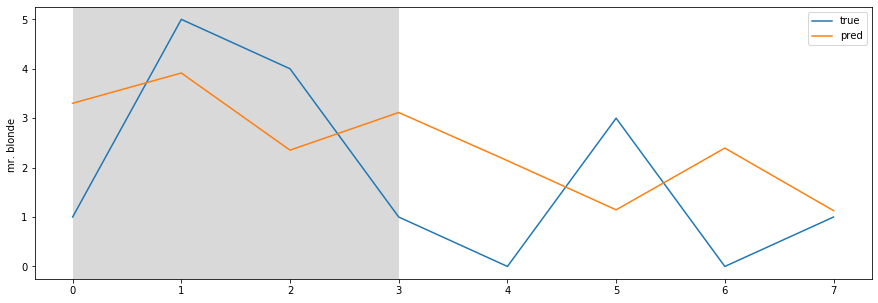

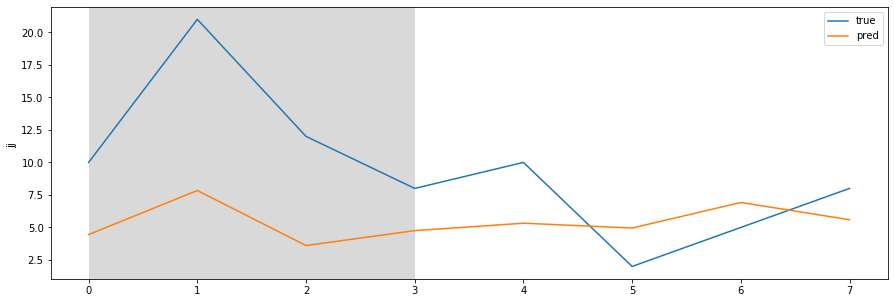

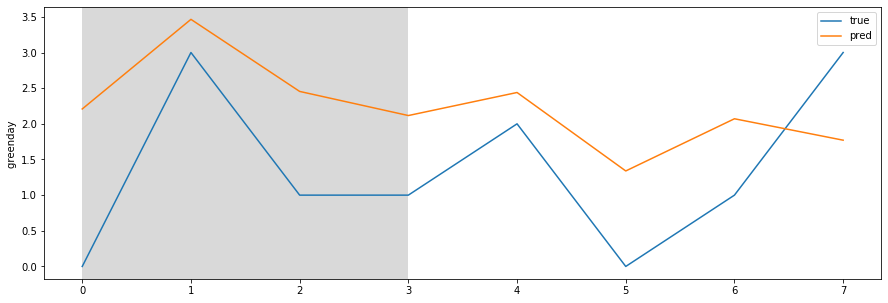

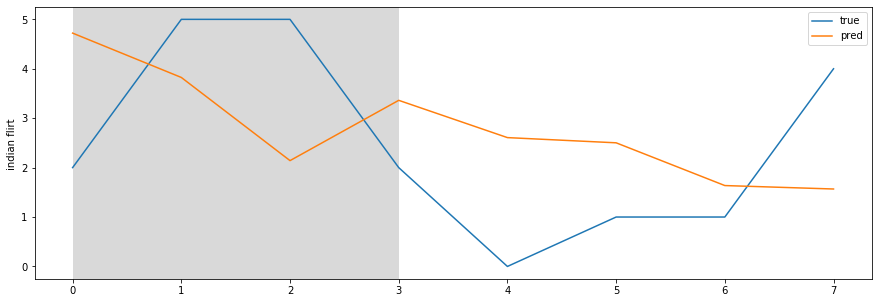

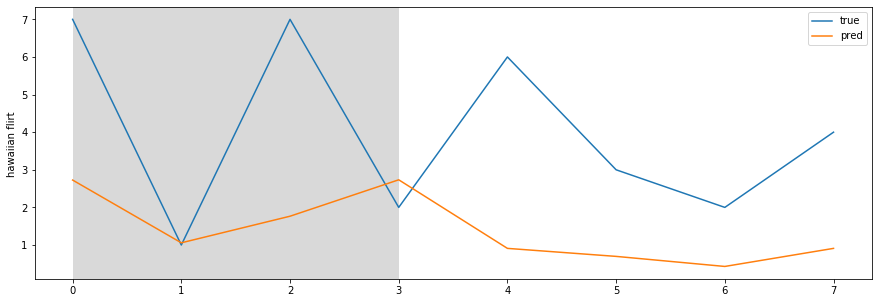

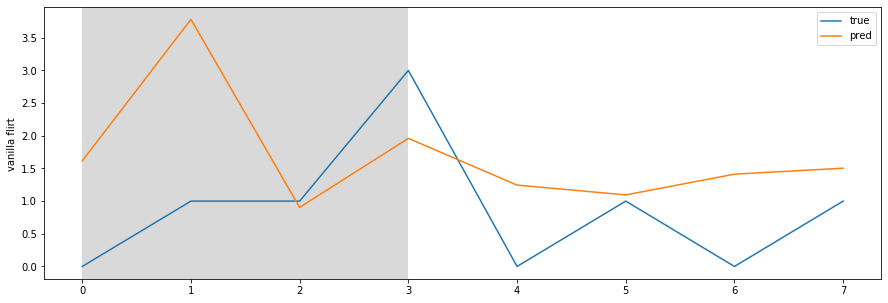

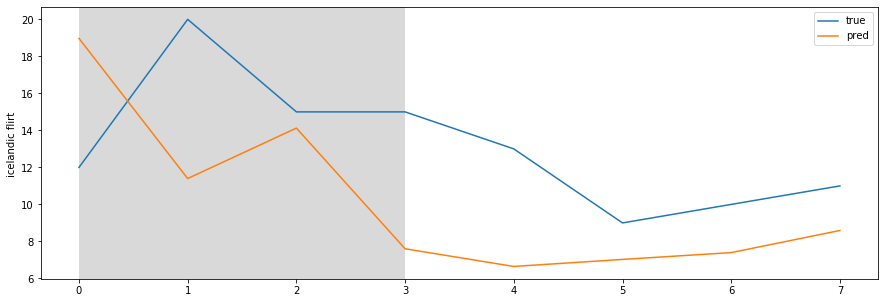

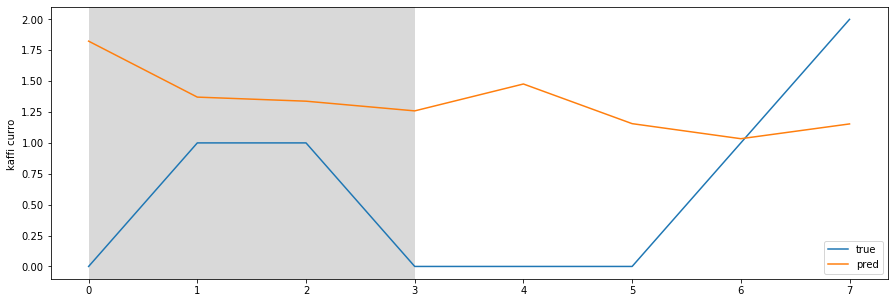

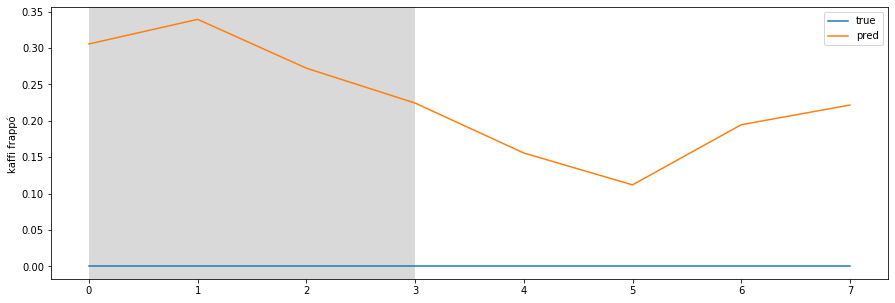

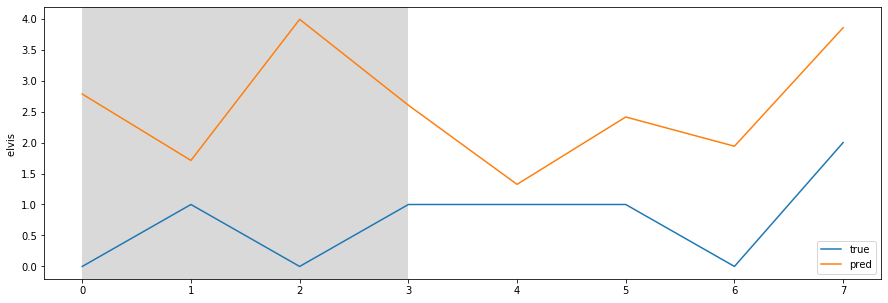

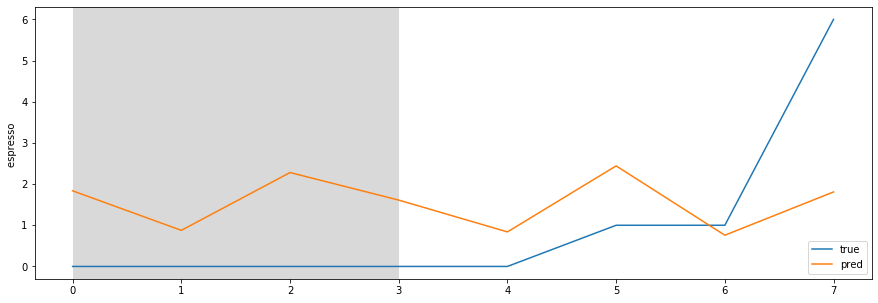

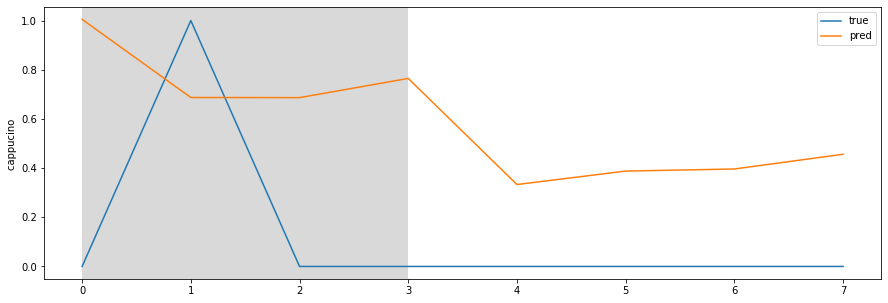

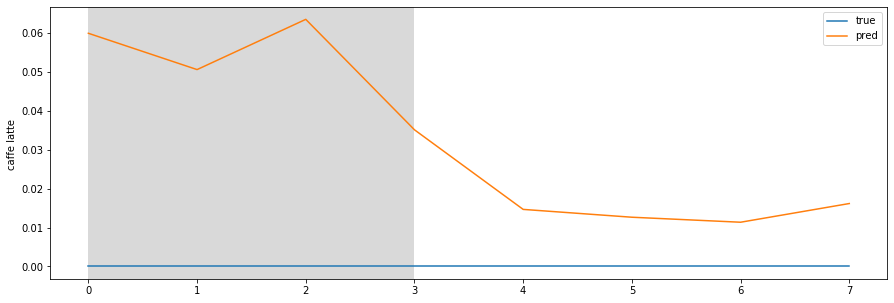

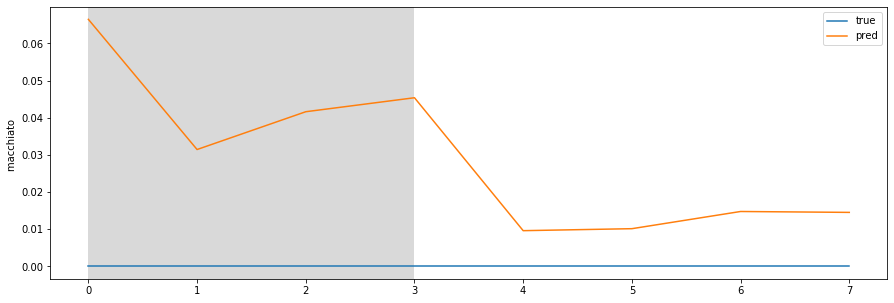

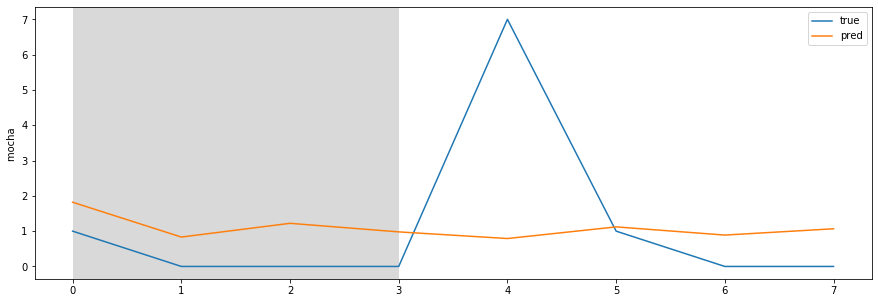

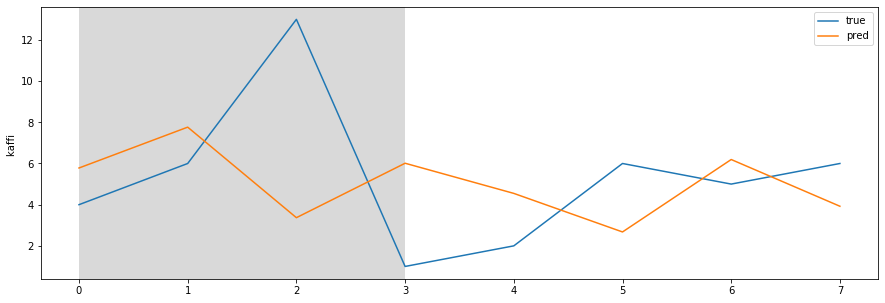

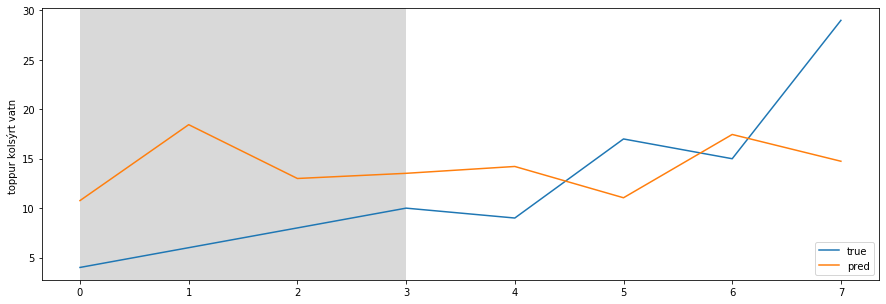

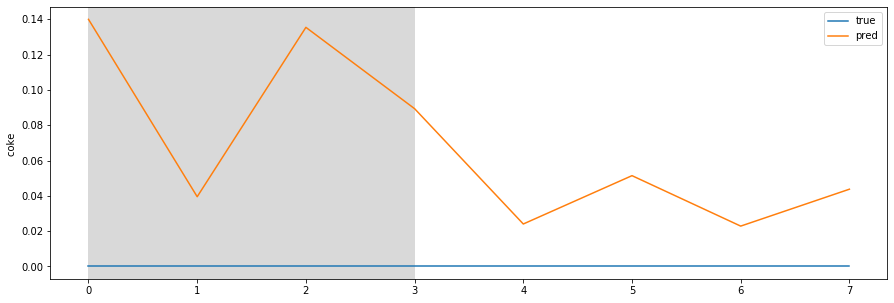

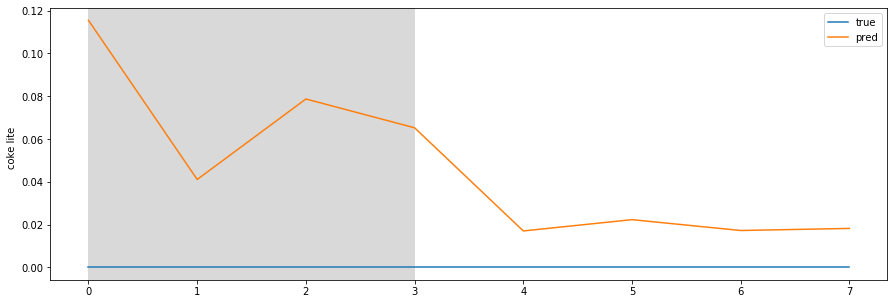

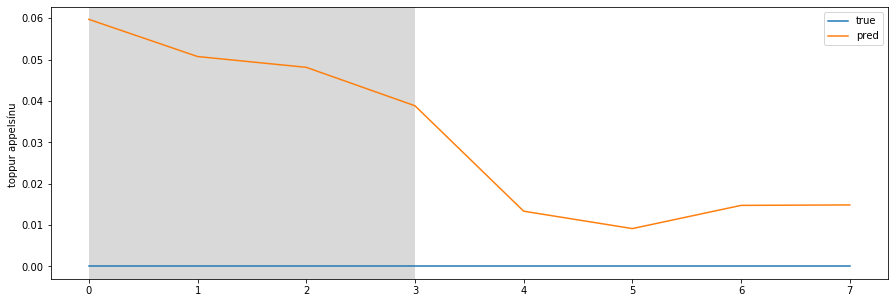

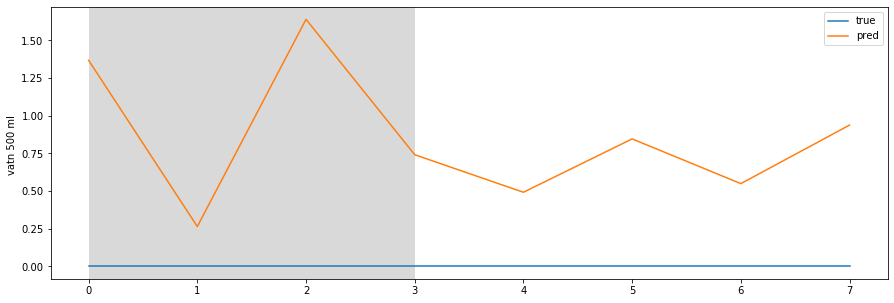

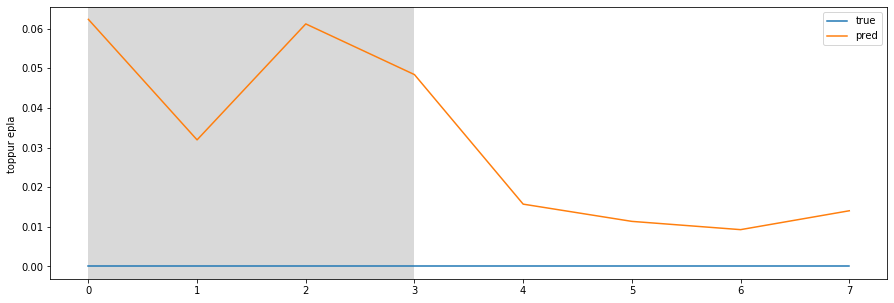

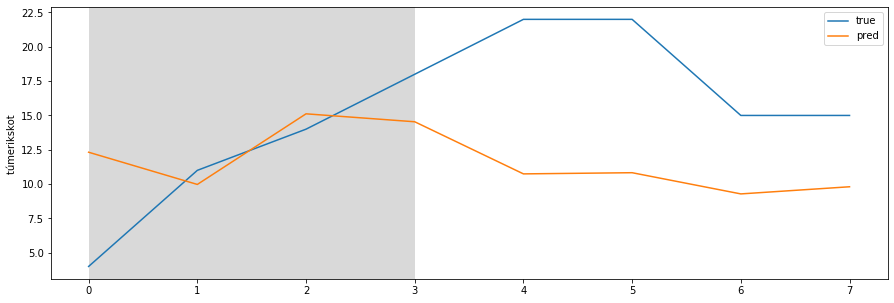

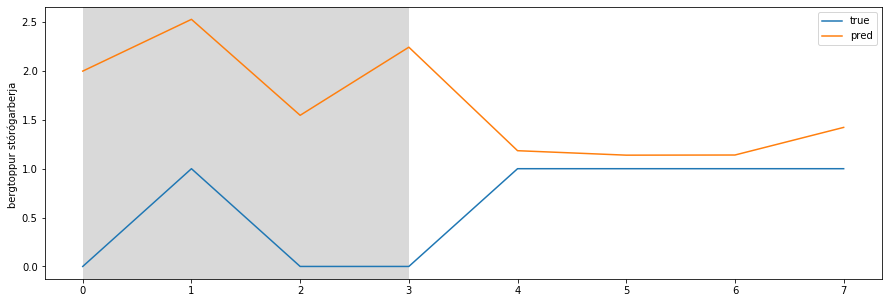

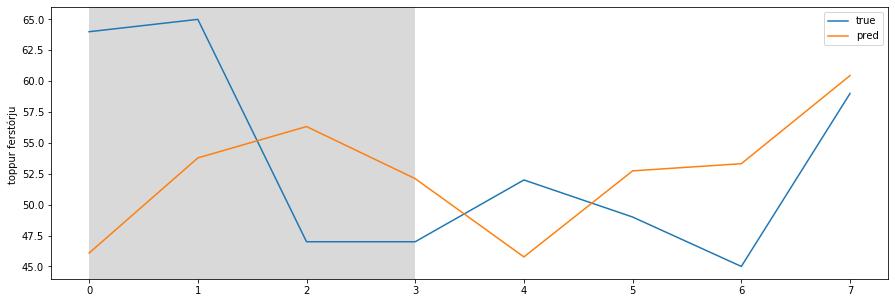

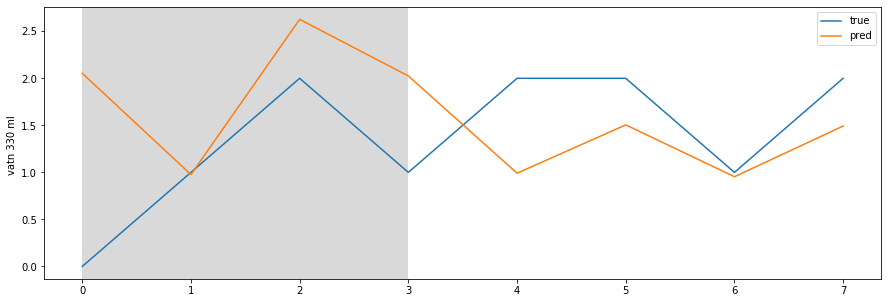

In [74]:
plot_comparison(start_idx=1, length=1000, train=False)

## RMS error

In [75]:
start_idx=1
length=1000

In [76]:
# Use test-data.
x = X_test_scaled
y_true = y_test

# End-index for the sequences.
end_idx = start_idx + length
    
# Select the sequences from the given start-index and
# of the given length.
x = x[start_idx:end_idx]
y_true = y_true[start_idx:end_idx]
    
# Input-signals for the model.
x = np.expand_dims(x, axis=0)

# Use the model to predict the output-signals.
y_pred = model.predict(x)
    
# The output of the model is between 0 and 1.
# Do an inverse map to get it back to the scale
# of the original data-set.
y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])

In [77]:
np.max(y_true)

105.0

In [78]:
np.min(y_true)

-4.0

In [79]:
np.mean(y_true)

6.622023809523809

In [80]:
RMS = np.sqrt((y_pred_rescaled-y_true)**2)
np.mean(RMS)

2.5223211034955013

In [81]:
np.max(RMS)

34.400474548339844

In [82]:
np.min(RMS)

0.0012146234512329102

## Validation
Quantify how much food was used vs how much was predicted

In [83]:
forecast = pd.DataFrame(data=y_pred_rescaled[-shift_days:],columns=targets).transpose().stack()
true = pd.DataFrame(data=y_true[-shift_days:],columns=targets).transpose().stack()

In [84]:
compare = pd.concat([forecast,true],axis=1,sort=False)
compare.columns=['forecast','true']
compare

forecast  true
hangover          0  22.504515  29.0
                  1  24.939251  14.0
                  2  26.047981  28.0
chango            0   1.896936   0.0
                  1   0.961142   1.0
...                        ...   ...
toppur ferstórju  1  53.315800  45.0
                  2  60.452126  59.0
vatn 330 ml       0   1.504922   2.0
                  1   0.953849   1.0
                  2   1.492821   2.0

[252 rows x 2 columns]

In [85]:
trueIng = pd.read_excel('ingredient_key.xlsx')
trueIng['Product #']=trueIng['Product #'].str.lower()
trueIng = trueIng.transpose()
trueIng.columns = trueIng.iloc[0]
trueIng.drop(trueIng.index[0],inplace=True)

In [86]:
ing_pred = pd.read_excel('ingredient_key.xlsx')
ing_pred['Product #']=ing_pred['Product #'].str.lower()
ing_pred = ing_pred.transpose()
ing_pred.columns = ing_pred.iloc[0]
ing_pred.drop(ing_pred.index[0],inplace=True)

In [87]:
totals = compare.groupby(level=0).sum()
totals.head()

,forecast,true
avócadó,23.205408,26.0
bergtoppur stórógarberja,3.701034,3.0
caffe latte,0.040161,0.0
cappucino,1.240296,0.0
chango,4.153523,3.0


In [88]:
ing_pred.head(2)

Product #,chango,chickencado,chickencurry,hangover,mozzato,parmella,pescado,spicy chicken,spicy tuna,spicy vegan,...,coke zero,gjafabréf,lítil poki,stór poki,toppur appelsínu,toppur epla,toppur ferstórju,toppur kolsýrt vatn,vatn 330 ml,vatn 500 ml
Bread,100,100,100,100,100,100,100,100,100,100,...,0,0,0,0,0,0,0,0,0,0
Pesto,0,20,20,20,20,20,20,20,20,20,...,0,0,0,0,0,0,0,0,0,0


In [89]:
trueIng.head(2)

Product #,chango,chickencado,chickencurry,hangover,mozzato,parmella,pescado,spicy chicken,spicy tuna,spicy vegan,...,coke zero,gjafabréf,lítil poki,stór poki,toppur appelsínu,toppur epla,toppur ferstórju,toppur kolsýrt vatn,vatn 330 ml,vatn 500 ml
Bread,100,100,100,100,100,100,100,100,100,100,...,0,0,0,0,0,0,0,0,0,0
Pesto,0,20,20,20,20,20,20,20,20,20,...,0,0,0,0,0,0,0,0,0,0


In [90]:
for x in targets:
    if x in ing_pred.columns:
        ing_pred[x] = ing_pred[x].apply(lambda y:y*totals.loc[x]['forecast'])

In [91]:
for x in targets:
    if x in trueIng.columns:
        trueIng[x] = trueIng[x].apply(lambda y:y*totals.loc[x]['true'])

In [92]:
totals = pd.DataFrame(index = ing_pred.index)

In [93]:
totals['Total Predicted [g]'] = ing_pred.sum(axis=1)
totals['Total True [g]'] = trueIng.sum(axis=1)

In [94]:
totals.index = totals.index.str.lower()

In [95]:
orders =pd.read_excel('Orders_Approximated.xlsx',index_col=0)

In [96]:
final = pd.concat([totals,orders],axis=1,sort=True).dropna()

In [97]:
final['Waste with Predictions [kg]'] = (final['Total Predicted [g]']-final['Total True [g]'])/1000
final['Waste [kg]'] = (final['Three Day Order [g]']-final['Total True [g]'])/1000

In [98]:
final

,Total Predicted [g],Total True [g],Three Day Order [g],Waste with Predictions [kg],Waste [kg]
apple,18604.694643,18849.0,360000.00,-0.244305,341.15100
avocado,21811.707544,20600.0,60000.00,1.211708,39.40000
banana,442.997229,560.0,15000.00,-0.117003,14.44000
basil,143.794009,101.0,625.00,0.042794,0.52400
bread,69476.304007,71750.0,112500.00,-2.273696,40.75000
chicken,41050.748417,43750.0,40000.00,-2.699252,-3.75000
cucumber,801.179714,940.0,1000.00,-0.138820,0.06000
ginger,695.267486,680.0,12000.00,0.015267,11.32000
green apple,430.000000,430.0,53750.00,0.000000,53.32000
lime,38.022513,10.0,1250.00,0.028023,1.24000


In [99]:
final['Waste with Predictions [kg]'].sum()
final['Waste [kg]'].sum()

print('The waste for three days of operation')
print('Waste with predictions:',final['Waste with Predictions [kg]'].sum(),'kg')
print('Waste without predictions:',final['Waste [kg]'].sum(),'kg')

The waste for three days of operation
Waste with predictions: -11.754688693344594 kg
Waste without predictions: 684.1062499999999 kg


In [100]:
from plotly  import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [101]:
final.iplot(kind='bar',y=['Waste with Predictions [kg]','Waste [kg]'],yTitle='Waste [kg]',colorscale='dark2',title='Three Days of Waste')